# 1 Recommendation Engine Project (on Hollywood Data)  -- Utkarsh Tripathi


### Detaset Link   -->https://drive.google.com/file/d/1cCkwiVv4mgfl20ntgY3n4yApcWqqZQe6/view

In [136]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import difflib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


In [137]:
df = pd.read_csv('movies.csv')
df[:3]

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes


In [138]:
movie_feature = df[['genres', 'keywords','tagline', 'cast', 'director', 'title']]

movie_feature[1:3]

,genres,keywords,tagline,cast,director,title
1,Adventure Fantasy Action,ocean drug abuse exotic island east india trad...,"At the end of the world, the adventure begins.",Johnny Depp Orlando Bloom Keira Knightley Stel...,Gore Verbinski,Pirates of the Caribbean: At World's End
2,Action Adventure Crime,spy based on novel secret agent sequel mi6,A Plan No One Escapes,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,Sam Mendes,Spectre


In [139]:
movie_feature.shape

(4803, 6)

In [140]:
#precentage of data missing

movie_feature.isnull().sum()/movie_feature.shape[0]*100

genres       0.582969
keywords     8.577972
tagline     17.572351
cast         0.895274
director     0.624610
title        0.000000
dtype: float64

<AxesSubplot:>

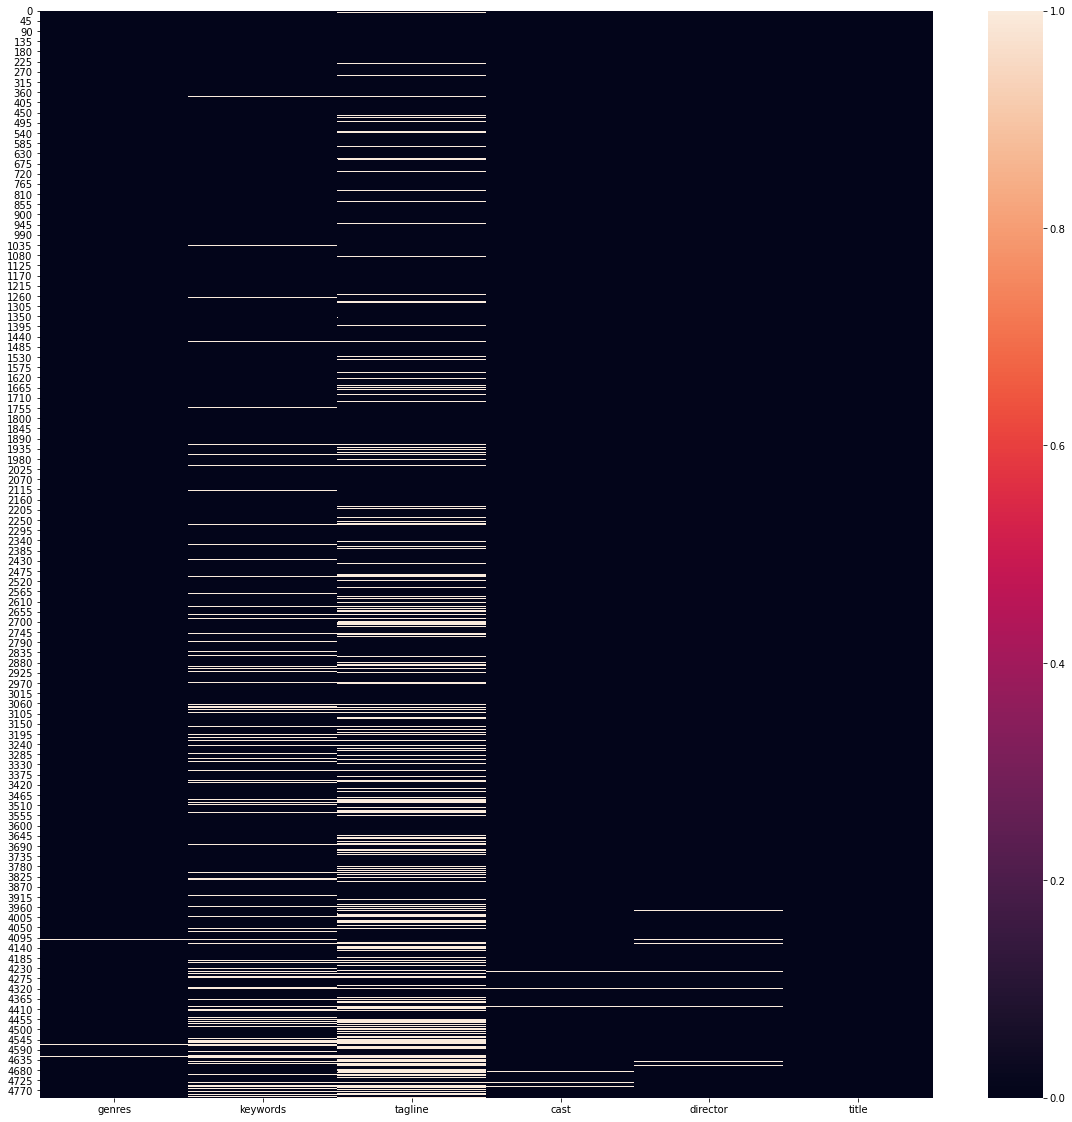

In [141]:
# Showing Missing Data through Graph

plt.figure(figsize=(20,20))
sb.heatmap(movie_feature.isnull())    

In [142]:
# filling Na values by ''

for feature in movie_feature:
    movie_feature[feature] = movie_feature[feature].fillna('')

<ipython-input-142-24426bdafcdb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_feature[feature] = movie_feature[feature].fillna('')


In [143]:
movie_feature.isnull().sum()

genres      0
keywords    0
tagline     0
cast        0
director    0
title       0
dtype: int64

In [144]:
movie_feature.shape

(4803, 6)

In [145]:
# Combining All 6 Features

combined_movie_features = movie_feature['genres']+' '+movie_feature['keywords']+'  ' +movie_feature['tagline']+ '  ' +movie_feature['cast']+ '  ' +movie_feature['director']+ '  ' +movie_feature['title']
combined_movie_features[:3]

0    Action Adventure Fantasy Science Fiction cultu...
1    Adventure Fantasy Action ocean drug abuse exot...
2    Action Adventure Crime spy based on novel secr...
dtype: object

In [146]:
# Converting text data to feature vector

feature_vector = TfidfVectorizer().fit_transform(combined_movie_features)
print(feature_vector)

  (0, 1183)	0.2771429775697421
  (0, 2720)	0.16779665077750835
  (0, 8651)	0.10950771233518673
  (0, 14400)	0.18869504935935053
  (0, 11288)	0.15600564366704217
  (0, 9709)	0.22061174669983702
  (0, 16170)	0.1471845509560594
  (0, 18477)	0.19277176743945276
  (0, 15542)	0.2000852661458036
  (0, 14718)	0.21153518149440184
  (0, 19148)	0.19502634639381392
  (0, 18845)	0.22968831190527222
  (0, 14749)	0.14568185359096344
  (0, 12700)	0.2552737122112953
  (0, 12356)	0.0757123618230531
  (0, 18835)	0.12179929157015998
  (0, 16904)	0.05365726945306951
  (0, 5519)	0.22061174669983702
  (0, 15785)	0.2044948505609709
  (0, 3587)	0.24248101205828376
  (0, 18385)	0.12067236175146148
  (0, 15901)	0.3255851082321633
  (0, 6519)	0.15884357175977004
  (0, 3408)	0.21574818782392274
  (0, 4103)	0.20781904654682548
  :	:
  (4801, 7731)	0.25682086501772416
  (4801, 12869)	0.1918304797254379
  (4801, 1880)	0.1383742924803071
  (4801, 12062)	0.1190062927991386
  (4801, 8323)	0.094776382167548
  (4801, 4234

In [147]:
# getting Similarity score using Cosine Similarity

similarity = cosine_similarity(feature_vector)
print(similarity)

[[1.         0.07294698 0.03533251 ... 0.         0.         0.        ]
 [0.07294698 1.         0.02792771 ... 0.04419983 0.         0.        ]
 [0.03533251 0.02792771 1.         ... 0.         0.04636139 0.        ]
 ...
 [0.         0.04419983 0.         ... 1.         0.         0.05551043]
 [0.         0.         0.04636139 ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.05551043 0.         1.        ]]


In [148]:
print(similarity.shape)

(4803, 4803)


In [149]:
movie_title_list = movie_feature['title'].tolist()
movie_title_list

['Avatar',
 "Pirates of the Caribbean: At World's End",
 'Spectre',
 'The Dark Knight Rises',
 'John Carter',
 'Spider-Man 3',
 'Tangled',
 'Avengers: Age of Ultron',
 'Harry Potter and the Half-Blood Prince',
 'Batman v Superman: Dawn of Justice',
 'Superman Returns',
 'Quantum of Solace',
 "Pirates of the Caribbean: Dead Man's Chest",
 'The Lone Ranger',
 'Man of Steel',
 'The Chronicles of Narnia: Prince Caspian',
 'The Avengers',
 'Pirates of the Caribbean: On Stranger Tides',
 'Men in Black 3',
 'The Hobbit: The Battle of the Five Armies',
 'The Amazing Spider-Man',
 'Robin Hood',
 'The Hobbit: The Desolation of Smaug',
 'The Golden Compass',
 'King Kong',
 'Titanic',
 'Captain America: Civil War',
 'Battleship',
 'Jurassic World',
 'Skyfall',
 'Spider-Man 2',
 'Iron Man 3',
 'Alice in Wonderland',
 'X-Men: The Last Stand',
 'Monsters University',
 'Transformers: Revenge of the Fallen',
 'Transformers: Age of Extinction',
 'Oz: The Great and Powerful',
 'The Amazing Spider-Man 2',

In [150]:
find_close_match = difflib.get_close_matches(given_movie_name, movie_title_list)

print(find_close_match)

['Iron Man', 'Iron Man 3', 'Iron Man 2']


In [151]:
close_match = find_close_match[0]
print(close_match)

Iron Man


In [152]:
index_of_movie = df[df.title == close_match]['index'].values[0]
print(index_of_movie)

68


In [153]:
# getting list of simmilar movie


similarity_score = list(enumerate(similarity[index_of_movie]))

print(similarity_score)

[(0, 0.031788706952946034), (1, 0.046550131420475115), (2, 0.012934561590593172), (3, 0.0057966667395479175), (4, 0.03165067765535342), (5, 0.028357091156416117), (6, 0.07168720055110567), (7, 0.20875006262020127), (8, 0.006975310482451501), (9, 0.06605386780791439), (10, 0.06867802007272139), (11, 0.011033952554608314), (12, 0.02568337857697453), (13, 0.011045653769360245), (14, 0.11907266090689927), (15, 0.006420912675943165), (16, 0.21440814789466553), (17, 0.011514125845904498), (18, 0.03912324028978291), (19, 0.06954741615159196), (20, 0.08802397045896385), (21, 0.01041414070436469), (22, 0.005643218539367042), (23, 0.005586000071139673), (24, 0.011990821940353034), (25, 0.0), (26, 0.18481877406697328), (27, 0.0292977479336761), (28, 0.05760515357324888), (29, 0.013166498250817452), (30, 0.0918761741313092), (31, 0.35885416360040373), (32, 0.0244430181996865), (33, 0.11885828396636185), (34, 0.0), (35, 0.031019275982003533), (36, 0.0262914922660381), (37, 0.006952185250051002), (3

In [154]:
sorted_similar_movies = sorted(similarity_score, key = lambda x:x[1], reverse = True )

print(sorted_similar_movies)

[(68, 1.0), (79, 0.45614934334351376), (31, 0.35885416360040373), (16, 0.21440814789466553), (7, 0.20875006262020127), (182, 0.19790382074393095), (26, 0.18481877406697328), (85, 0.18296213591195276), (511, 0.1614076737790391), (3623, 0.1538210499589333), (64, 0.14449608709036715), (203, 0.1408701093540761), (174, 0.13831480121251366), (101, 0.1344393143974127), (788, 0.1265975877268307), (1740, 0.12552233133584528), (46, 0.12531693787984177), (94, 0.12429106316337901), (126, 0.12391547678033552), (169, 0.12370815738198505), (131, 0.12364422935328384), (14, 0.11907266090689927), (33, 0.11885828396636185), (38, 0.11834263945039614), (2487, 0.11648585931776062), (783, 0.11478161939440633), (138, 0.11024029007331937), (661, 0.1098325135037601), (2651, 0.10799596845649564), (3166, 0.10666994373647781), (2442, 0.10559587158614465), (353, 0.10551242719736846), (870, 0.10541988580817355), (1553, 0.10335616876622741), (607, 0.10217385172988047), (1451, 0.10146217275056554), (2411, 0.1007755495

In [155]:
#   suggested movie

i = 1

for movie in sorted_similar_movies:
    index = movie[0]
    title_from_index = df[df.index==index]['title'].values[0]
    if (i<31):
        print(i, '--', title_from_index)
        i+=1


1 -- Iron Man
2 -- Iron Man 2
3 -- Iron Man 3
4 -- The Avengers
5 -- Avengers: Age of Ultron
6 -- Ant-Man
7 -- Captain America: Civil War
8 -- Captain America: The Winter Soldier
9 -- X-Men
10 -- Made
11 -- X-Men: Apocalypse
12 -- X2
13 -- The Incredible Hulk
14 -- X-Men: First Class
15 -- Deadpool
16 -- Kick-Ass 2
17 -- X-Men: Days of Future Past
18 -- Guardians of the Galaxy
19 -- Thor: The Dark World
20 -- Captain America: The First Avenger
21 -- G-Force
22 -- Man of Steel
23 -- X-Men: The Last Stand
24 -- The Amazing Spider-Man 2
25 -- Duets
26 -- Mortdecai
27 -- The Last Airbender
28 -- Zathura: A Space Adventure
29 -- The Good Night
30 -- The Best Man


### summing up all  above Code in one Cell. 

In [156]:


given_movie_name = input("what movie do you want to watch --->  ")

movie_title_list = movie_feature['title'].tolist()

find_close_match = difflib.get_close_matches(given_movie_name, movie_title_list)

close_match = find_close_match[0]

index_of_movie = df[df.title == close_match]['index'].values[0]

similarity_score = list(enumerate(similarity[index_of_movie]))

sorted_similar_movies = sorted(similarity_score, key = lambda x:x[1], reverse = True )

 
i = 1

for movie in sorted_similar_movies:
    index = movie[0]
    title_from_index = df[df.index==index]['title'].values[0]
    if (i<31):
        print(i, '--', title_from_index)
        i+=1





what movie do you want to watch --->  Spider man
1 -- Spider-Man
2 -- Spider-Man 3
3 -- Spider-Man 2
4 -- Oz: The Great and Powerful
5 -- The Notebook
6 -- Seabiscuit
7 -- The Amazing Spider-Man
8 -- Clerks II
9 -- Barney's Great Adventure
10 -- The Ice Storm
11 -- The Great Gatsby
12 -- The Amazing Spider-Man 2
13 -- The Count of Monte Cristo
14 -- Horrible Bosses
15 -- Brothers
16 -- Finding Nemo
17 -- In Good Company
18 -- The Good German
19 -- Clear and Present Danger
20 -- The Life Aquatic with Steve Zissou
21 -- The Great Raid
22 -- Charlotte's Web
23 -- Drag Me to Hell
24 -- Bambi
25 -- Along Came a Spider
26 -- Daybreakers
27 -- Out of the Furnace
28 -- Charly
29 -- Cirque du Freak: The Vampire's Assistant
30 -- A Most Wanted Man
